# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv('winequality-red.csv', delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Initial Analysis

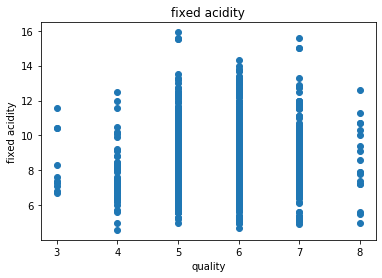

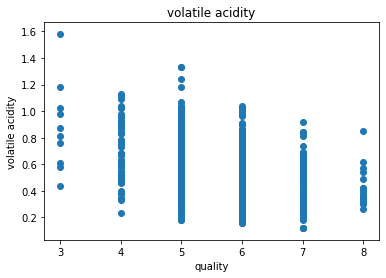

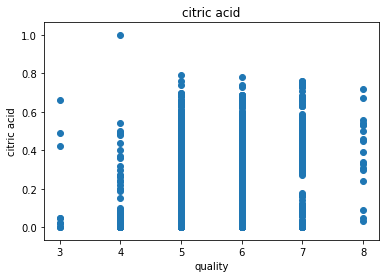

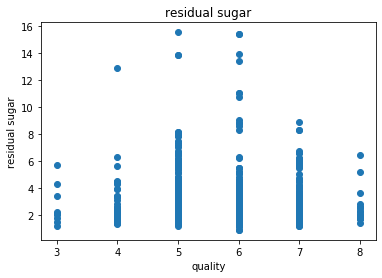

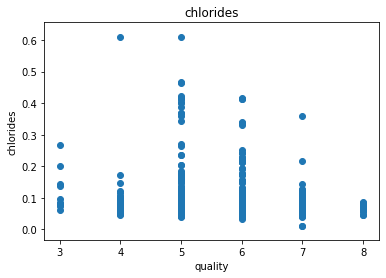

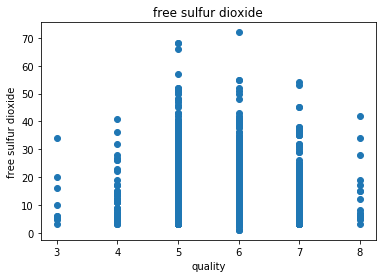

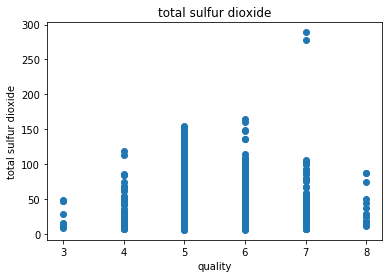

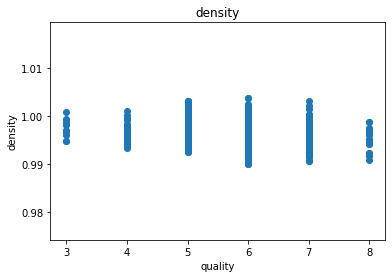

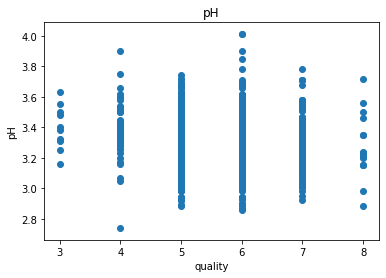

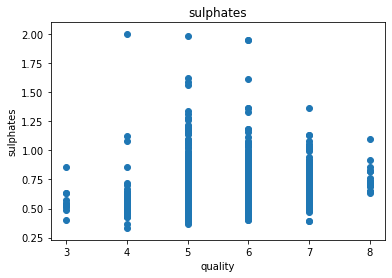

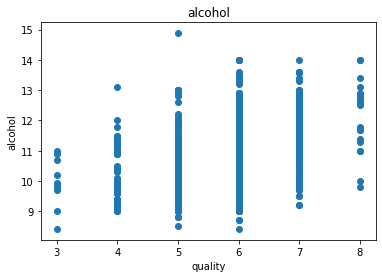

In [4]:
for label in data.columns[:-1]:
# for label in ['alcohol']:
    plt.scatter(data['quality'], data[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.show()

# Training and testing data

In [6]:
bins = [0, 5.5, 7.5, 10]
labels = [0, 1, 2]
data['quality'] = pd.cut(data['quality'], bins=bins, labels=labels)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
a = data[data.columns[:-1]]
b = data['quality']
sc = StandardScaler()
a = sc.fit_transform(a)

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=.2, random_state=42)

In [8]:
for i in [b_train, b_test]:
    print(i.describe())

count     1279
unique       3
top          1
freq       663
Name: quality, dtype: int64
count     320
unique      3
top         1
freq      174
Name: quality, dtype: int64


# KNN Classifier

In [9]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(a_train, b_train)
predict_n3 = n3.predict(a_test)
print(classification_report(b_test, predict_n3))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       141
           1       0.69      0.72      0.71       174
           2       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.45      0.45      0.45       320
weighted avg       0.67      0.68      0.67       320



In [10]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(a_train, b_train)
predict_n5 = n5.predict(a_test)
print(classification_report(b_test, predict_n5))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       141
           1       0.70      0.77      0.73       174
           2       0.00      0.00      0.00         5

    accuracy                           0.69       320
   macro avg       0.46      0.46      0.46       320
weighted avg       0.68      0.69      0.68       320



C:\Users\Amit kumar mishra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [11]:
dt = DecisionTreeClassifier()
dt.fit(a_train, b_train)
predict_dt = dt.predict(a_test)
print(classification_report(b_test, predict_dt))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       141
           1       0.74      0.75      0.74       174
           2       0.25      0.20      0.22         5

    accuracy                           0.72       320
   macro avg       0.57      0.55      0.56       320
weighted avg       0.72      0.72      0.72       320



# Random Forest Classifier

In [12]:
rf = RandomForestClassifier()
rf.fit(a_train, b_train)
predict_rf = rf.predict(a_test)
print(classification_report(b_test, predict_rf))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       141
           1       0.79      0.80      0.80       174
           2       0.00      0.00      0.00         5

    accuracy                           0.78       320
   macro avg       0.52      0.53      0.52       320
weighted avg       0.77      0.78      0.77       320



# Stochastic Gradient Descent

In [13]:
sgd = SGDClassifier()
sgd.fit(a_train, b_train)
predict_sgd = sgd.predict(a_test)
print(classification_report(b_test, predict_sgd))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       141
           1       0.73      0.71      0.72       174
           2       0.00      0.00      0.00         5

    accuracy                           0.70       320
   macro avg       0.46      0.47      0.47       320
weighted avg       0.69      0.70      0.69       320



C:\Users\Amit kumar mishra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Opimize the result

In [14]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# random grid
randomgrid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=randomgrid, n_iter=100, cv=3, verbose=2, random_state=42)

# print(rf_optimized.best_params_)

rf_optimized.fit(a_train, b_train)
predict_optimized = rf_optimized.predict(a_test)
print(classification_report(y_test, predict_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   5.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.6s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   2.9s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   3.0s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_sa

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 13.6min finished


NameError: name 'y_test' is not defined

In [15]:
print(classification_report(b_test, predict_optimized))
print(rf_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       141
           1       0.79      0.80      0.80       174
           2       0.00      0.00      0.00         5

    accuracy                           0.78       320
   macro avg       0.52      0.52      0.52       320
weighted avg       0.77      0.78      0.77       320

{'n_estimators': 261, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 98, 'bootstrap': True}
